In [1]:
import os
import yaml
import glob

from python_scripts.simulation import step_simulation
from python_scripts.visualizer import Visualizer
from commonroad.common.file_reader import CommonRoadFileReader

import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML


In [2]:
def merge_config(global_config, scenario_config):
    global_config["simulation_duration"] = scenario_config["simulation_duration"]
    global_config["initial_state_x"] = scenario_config["initial_state_x"]
    global_config["initial_state_y"] = scenario_config["initial_state_y"]
    global_config["initial_state_orientation"] = scenario_config["initial_state_orientation"]
    global_config["initial_state_velocity"] = scenario_config["initial_state_velocity"]
    global_config["vehicle_type"] = scenario_config["vehicle_type"]
    global_config["vehicle_length"] = scenario_config["vehicle_length"]
    global_config["vehicle_width"] = scenario_config["vehicle_width"]
    global_config["reference_speed"] = scenario_config["reference_velocity"]
    global_config["planning_horizon"] = scenario_config["planning_horizon"]
    global_config["goal_point_x"] = scenario_config["goal_point_x"]
    global_config["goal_point_y"] = scenario_config["goal_point_y"]
    global_config["occlusion_params"]["vmax"] = scenario_config["vmax"]
    global_config["occlusion_params"]["prediction_horizon"] = scenario_config["planning_horizon"]

    return global_config

def save_results(filename, tracked_vehicle, tracked_scenarios, tracked_shadows, baseline_vehicle, baseline_scenarios, baseline_shadows):
    pass

## Visualise scenario

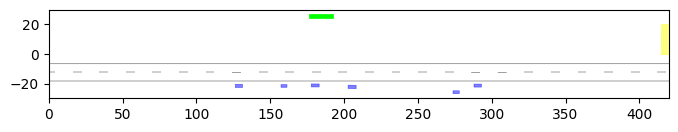

In [17]:
scenario_path = "scenarios/highd_loc2/ZAM_HighD-2_1_T-1"

with open("scenarios/highd_config.yaml") as file:
    global_config = yaml.load(file, Loader=yaml.FullLoader)
with open(scenario_path + ".yaml") as file:
    scenario_config = yaml.load(file, Loader=yaml.FullLoader)
config = merge_config(global_config, scenario_config)

scenario, _ = CommonRoadFileReader(scenario_path + ".xml").open()

def plot_full_scenario(timestep, scenario, config):
    plt.cla()
    Visualizer().plot_unsimulated(scenario, config, timestep)
    plt.axis('scaled')
    plt.xlim(0,420)
    plt.ylim(-30,30)

fig = plt.figure(figsize=(12, 4))
anim = animation.FuncAnimation(fig, plot_full_scenario, fargs=[scenario, config], frames=range(config["simulation_duration"]), interval=100, blit=False)
HTML(anim.to_html5_video())


## Run a single scenario

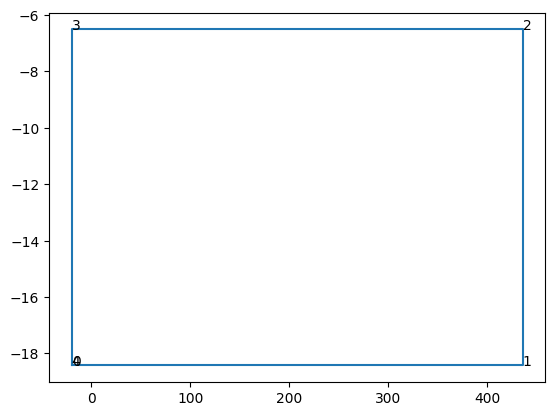

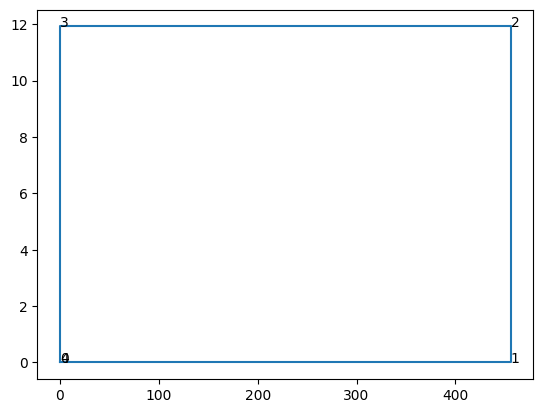

Running simulation:   0%|          | 0/31 [00:01<?, ?it/s]


AttributeError: 'list' object has no attribute 'center_vertices'

In [4]:
override_results = False # Decides if these results will override potential logged results
scenario_path = "scenarios/highd_loc1/ZAM_HighD-1_1_T-1"

with open("scenarios/highd_config.yaml") as file:
    global_config = yaml.load(file, Loader=yaml.FullLoader)
with open(scenario_path + ".yaml") as file:
    scenario_config = yaml.load(file, Loader=yaml.FullLoader)
config = merge_config(global_config, scenario_config)

scenario1, _ = CommonRoadFileReader(scenario_path + ".xml").open()
scenario2, _ = CommonRoadFileReader(scenario_path + ".xml").open()

config['occlusion_params']['velocity_tracking_enabled'] = True
tracked_vehicle, tracked_scenarios, tracked_views, tracked_shadows = step_simulation(scenario1, config)

config['occlusion_params']['velocity_tracking_enabled'] = False
no_track_vehicle, not_tracked_scenarios, not_tracked_views, not_tracked_shadows = step_simulation(scenario2, config)

if override_results:
    save_results()

## Run all scenarios

ZAM_HighD-1_10_T-1


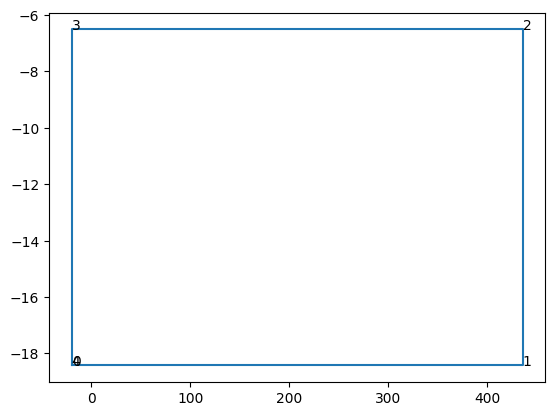

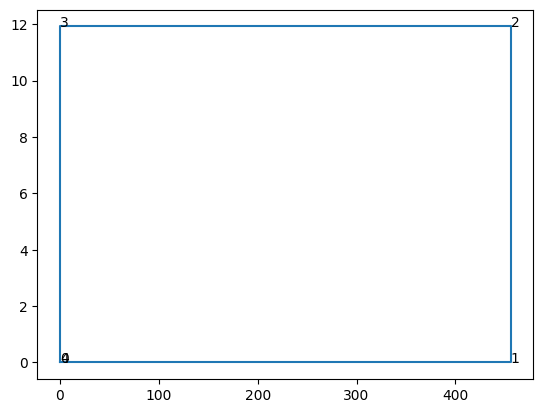

Running simulation:   0%|          | 0/31 [00:00<?, ?it/s]

Simulation raised an error for scenario  ZAM_HighD-1_10_T-1


TypeError: save_results() missing 7 required positional arguments: 'filename', 'tracked_vehicle', 'tracked_scenarios', 'tracked_shadows', 'baseline_vehicle', 'baseline_scenarios', and 'baseline_shadows'

In [ ]:
skip_existing = True # Skips any scenarios that already have existing results.

scenario_path = "scenarios/"
results_path = "results/"
path_xml = os.path.join(scenario_path, "highd_loc*","*.xml")
path_yaml = os.path.join(scenario_path, "highd_loc*","*.yaml")

xml_list = sorted(glob.glob(path_xml))
yaml_list = sorted(glob.glob(path_yaml))

with open("scenarios/highd_config.yaml") as file:
    global_config = yaml.load(file, Loader=yaml.FullLoader)

for xml_file, yaml_file in zip(xml_list, yaml_list):
    scenario1, _ = CommonRoadFileReader(xml_file).open()
    scenario2, _ = CommonRoadFileReader(xml_file).open()
    with open(yaml_file) as file:
        scenario_config = yaml.load(file, Loader=yaml.FullLoader)
    config = merge_config(global_config, scenario_config)

    if skip_existing and os.path.isfile(os.path.join(results_path, scenario1.scenario_id)):
        continue

    try:
        config['occlusion_params']['velocity_tracking_enabled'] = True
        tracked_vehicle, tracked_scenarios, tracked_views, tracked_shadows = step_simulation(scenario1, config)

        config['occlusion_params']['velocity_tracking_enabled'] = False
        no_track_vehicle, not_tracked_scenarios, not_tracked_views, not_tracked_shadows = step_simulation(scenario2, config)

    except Exception as e:
        print("Simulation raised an error for scenario ", scenario1.scenario_id)

    save_results()
    

    
    